# Лабораторная работа
## Тема: Устойчивые словосочетания, термины и их извлечение из текстов
#### Автор : Панда Анил
#### Группа : ИУ9-11М
#### Предмет: Автоматическая обработка текстов и семантические модели

In [25]:
import fileinput
import re
import operator
import sys
from collections import Counter
from math import log

In [26]:
#Мы берем научный текст из корпуса русского языка, в котором все слова морфологически разобраны

words = (word for line in fileinput.input(
    'out.txt',openhook=fileinput.hook_encoded("utf8"))
    for word in re.findall(r'\{[\w|=|,]*\}', # используем регулярное выражение, чтобы разделить по словам
                           line.casefold()))

In [27]:
# На основе имеющихся данных получаем все слова из текста, а так же выделяем часть речи для каждого
wordparts = list()
for word in words:
    # так как часть речи это первый параметр, мы просто находим значение между первым "=" и первой ","
    a = word.find('=')
    b = word[a+1:].find('=')
    c = word[a+1:].find(',')
    d = min(b, c)
    if c==-1:
        d = b
    if b==-1:
        d = c
    wordparts.append([word[1:a], word[a+1:d+a+1]])

In [28]:
# найдем количество употреблений каждого слова в тексте
single_words_freq = dict()
for word in wordparts:
    if word[0] in single_words_freq:
        single_words_freq[word[0]]  = single_words_freq[word[0]] + 1
    else:
        single_words_freq[word[0]] = 1

In [29]:
# найдем рядом стоящие пары существительное-прилагательное

n_adj_pairs = list()
for i in range (1, len(wordparts)):
    adjs = wordparts[i-1]
    nouns = wordparts[i]
    if (adjs[1]=="a" and nouns[1]=="s"):
        n_adj_pairs.append((adjs[0], nouns[0]))

#### Упорядочим по частоте

In [30]:
# используем объект счетчика из модуля collections, чтобы подсчитать  количество пар в тексте
n_adj_pairs_freq = Counter(n_adj_pairs)
# отсортируем полученный список по частоте
for word, freq in n_adj_pairs_freq.most_common():
    print(str(word) + ": " + str(freq))

('специальный', 'теория'): 4
('инерциальный', 'система'): 3
('больший', 'скорость'): 3
('массивный', 'частица'): 2
('сверхсветовой', 'передача'): 2
('групповой', 'скорость'): 2
('фазовый', 'скорость'): 2
('маленький', 'скорость'): 2
('естественный', 'система'): 2
('абсолютный', 'величина'): 1
('электромагнитный', 'волна'): 1
('латинский', 'буква'): 1
('отдельный', 'тело'): 1
('элементарный', 'частица'): 1
('предельный', 'скорость'): 1
('точный', 'измерение'): 1
('эталонный', 'метр'): 1
('данный', 'момент'): 1
('равный', 'м'): 1
('международный', 'система'): 1
('равный', 'секунда'): 1
('электромагнитный', 'излучение'): 1
('рентгеновский', 'луч'): 1
('гравитационный', 'волна'): 1
('большой', 'коллайдер'): 1
('космический', 'луч'): 1
('современный', 'физика'): 1
('причинный', 'воздействие'): 1
('физический', 'тело'): 1
('запутанный', 'состояние'): 1
('классический', 'канал'): 1
('современный', 'точка'): 1
('солнечный', 'зайчик'): 1
('прозрачный', 'среда'): 1
('монохроматический', 'свет'):

In [31]:
#заполним массивы по мере взаимной информации и MC-value

mutual_inf_values = dict()
mc_values = dict()
for pair, count in n_adj_pairs_freq.most_common():
    mutual_inf_values[pair] = log(count * len(wordparts)/
                                  single_words_freq[pair[0]]/
                                  single_words_freq[pair[1]])
    w1 = pair[0]
    w2 = pair[1]
    pw1c = 0
    pw1f = 0
    
    # по мере взаимной информации
    for word, count in n_adj_pairs_freq.most_common():
        if word[0]==w1 or word[1]==w1:
            pw1c=pw1c+1
            pw1f=pw1f+count
            
    mc1 = single_words_freq[w1] - pw1f/pw1c
    pw2c = 0
    pw2f = 0
    
    # по MC-value
    for word, count in n_adj_pairs_freq.most_common():
        if word[0] == w2 or word[1] == w2:
            pw2c = pw2c + 1
            pw2f = pw2f + count
    mc2 = single_words_freq[w2] - pw2f / pw2c
    mc_values[pair] = mc1+mc2

#### Упорядочим по мере взаимной информации

In [32]:
# отсортируем элементы по мере уменьшения значение и выведем
mutual_inf_values_sort = [ (m,n) for n,m in mutual_inf_values.items() ]
mutual_inf_values_sort.sort(reverse=True)
for m,n in mutual_inf_values_sort:
    print (str(n) + ": " + str(m))

('энергетический', 'переход'): 6.77078942390898
('солнечный', 'зайчик'): 6.77078942390898
('светоносный', 'эфир'): 6.77078942390898
('передний', 'фронт'): 6.77078942390898
('оптический', 'резонатор'): 6.77078942390898
('новый', 'вариация'): 6.77078942390898
('невозможный', 'арман'): 6.77078942390898
('медленный', 'коэффициент'): 6.77078942390898
('латинский', 'буква'): 6.77078942390898
('классический', 'канал'): 6.77078942390898
('жесткий', 'ограничение'): 6.77078942390898
('данный', 'момент'): 6.77078942390898
('большой', 'коллайдер'): 6.77078942390898
('абсолютный', 'величина'): 6.77078942390898
('эталонный', 'метр'): 6.077642243349034
('удаленный', 'приемник'): 6.077642243349034
('убедительный', 'доказательство'): 6.077642243349034
('точный', 'измерение'): 6.077642243349034
('причинный', 'воздействие'): 6.077642243349034
('отдельный', 'тело'): 6.077642243349034
('магнитный', 'поле'): 6.077642243349034
('запутанный', 'состояние'): 6.077642243349034
('дополнительный', 'договоренность'

#### Упорядочим по MC-value

In [33]:
# отсортируем элементы по мере уменьшения значение и выведем
mc_value_sort = [ (m,n) for n,m in mc_values.items() ]
mc_value_sort.sort(reverse=True)
for m,n in mc_value_sort:
    print (str(n) + ": " + str(m))

('фазовый', 'скорость'): 58.285714285714285
('маленький', 'скорость'): 58.285714285714285
('релятивистский', 'скорость'): 57.285714285714285
('предельный', 'скорость'): 57.285714285714285
('односторонний', 'скорость'): 57.285714285714285
('групповой', 'скорость'): 57.285714285714285
('больший', 'скорость'): 57.285714285714285
('монохроматический', 'свет'): 40.0
('равновесный', 'среда'): 9.0
('прозрачный', 'среда'): 9.0
('неравновесный', 'среда'): 9.0
('международный', 'система'): 9.0
('инерциальный', 'система'): 9.0
('естественный', 'система'): 9.0
('электромагнитный', 'волна'): 7.0
('световой', 'волна'): 7.0
('гравитационный', 'волна'): 6.0
('равный', 'м'): 5.0
('основной', 'единица'): 5.0
('двусторонний', 'эксперимент'): 5.0
('элементарный', 'частица'): 4.666666666666667
('массивный', 'частица'): 4.666666666666667
('безмассовый', 'частица'): 4.666666666666667
('фундаментальный', 'константа'): 3.0
('физический', 'тело'): 3.0
('современный', 'физика'): 3.0
('световой', 'луч'): 3.0
('св

#### Полученная статистика видна на картинке ниже

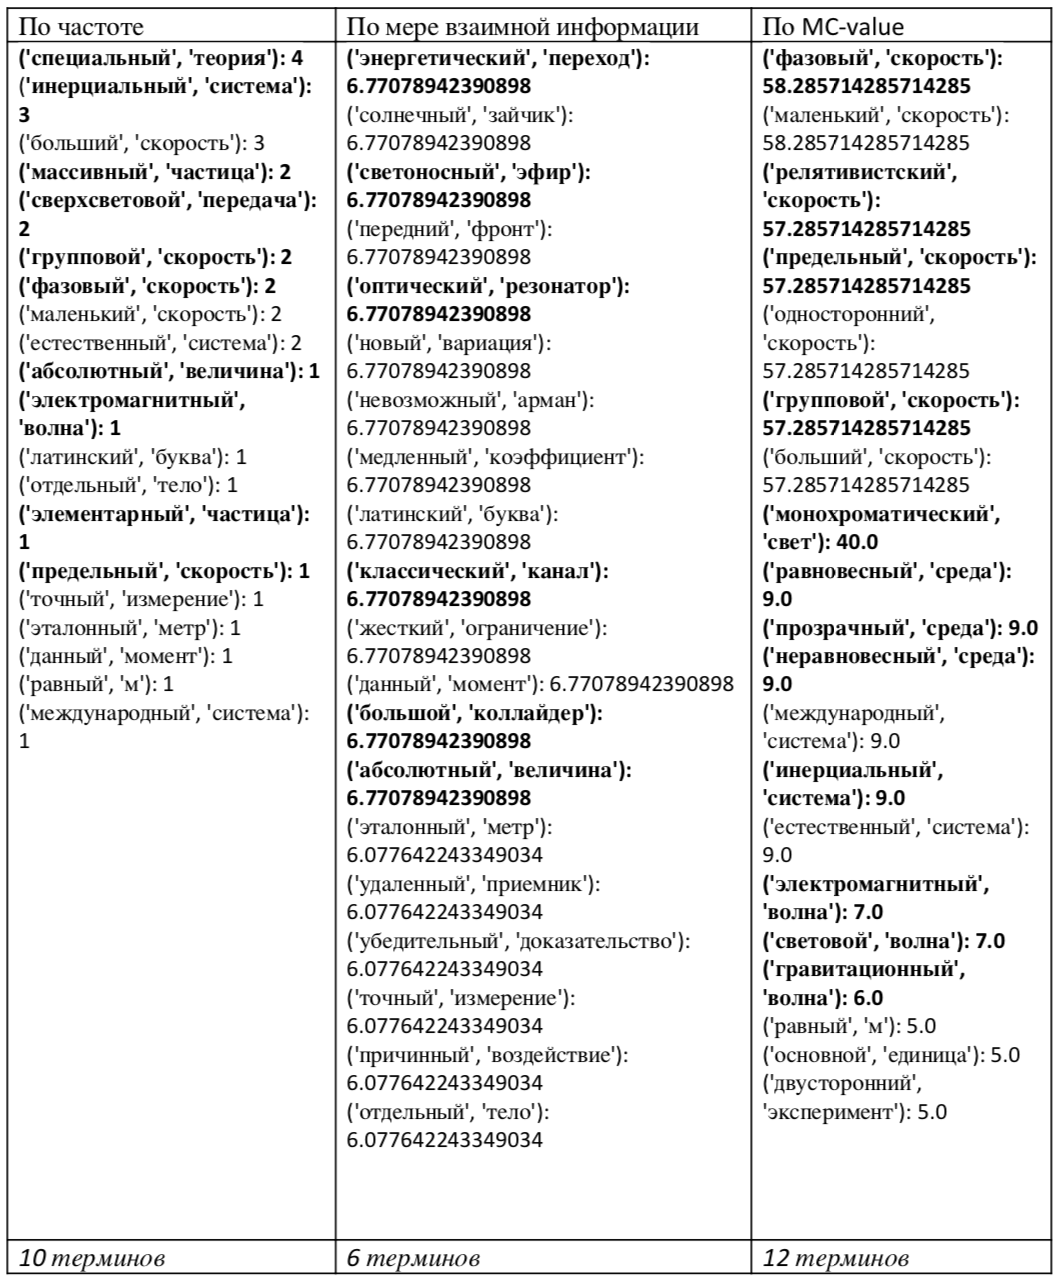

In [34]:
from IPython.display import Image
Image(filename='stats.png')